In [27]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [28]:
# Load the CSV file
data = pd.read_csv('/content/vegetables.csv')

# Display first few rows
data.head(5)

,vitamin_a,vitamin_c,fiber,type
0,70.783510,35.779827,8.313735,root
1,54.353822,49.421245,5.989785,fruit
2,8.172535,82.824925,1.149330,fruit
3,45.830064,33.520805,0.938573,leafy
4,48.469629,17.376159,9.096268,root


In [29]:
# Display last few rows
data.tail(5)

,vitamin_a,vitamin_c,fiber,type
95,71.024280,58.280684,0.801800,leafy
96,31.435011,99.543752,3.547713,root
97,47.116790,85.569609,9.417257,leafy
98,82.163690,52.144569,6.685726,root
99,45.926520,6.364091,6.786700,fruit


In [30]:
# Basic data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vitamin_a  100 non-null    float64
 1   vitamin_c  100 non-null    float64
 2   fiber      100 non-null    float64
 3   type       100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.3+ KB


In [31]:
# Check if there are missing values
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

vitamin_a    0
vitamin_c    0
fiber        0
type         0
dtype: int64


In [32]:
# Separate features and target
X = data[['vitamin_a', 'vitamin_c', 'fiber']]
y = data['type']

# Encode target labels
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.25
Precision: 0.21
Recall: 0.25


In [33]:
# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))


Classification Report:

              precision    recall  f1-score   support

       fruit       0.36      0.57      0.44         7
       leafy       0.00      0.00      0.00         5
        root       0.20      0.12      0.15         8

    accuracy                           0.25        20
   macro avg       0.19      0.23      0.20        20
weighted avg       0.21      0.25      0.22        20



In [34]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

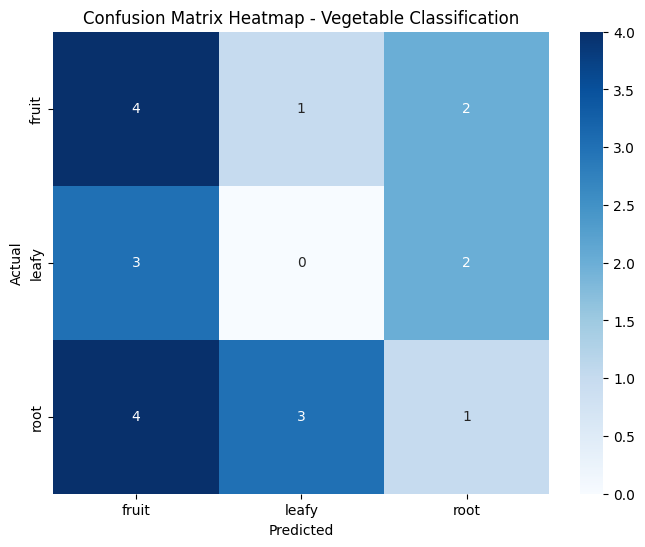

In [36]:
# Heatmap of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Vegetable Classification')
plt.show()